## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#Scikit learn imports:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Other
from src.dataprep import prep_df
df = prep_df()
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-1.277445,-1.160323,-0.994194
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.066327,-0.259629,-0.173740
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,-1.236724,-0.362660,-0.959649
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.514251,-0.746535,-0.195248
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,-1.236724,0.197365,-0.940457


## Quick Recap

Models are biased in favor of non churned customers, which is not great if I really want to spot who's gonna churn, this is likely due to there being far more examples of not churned customers.

(array([5163.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

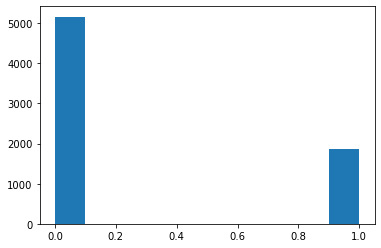

In [3]:
plt.hist(df['Churn'])

There are more than double the 0 (not churned) customers than 1 (churned) customers, I will fix this with Synthetic Minority Oversampling Technique, aka SMOTE

In [4]:
pip install imblearn

     |████████████████████████████████| 167 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
smote = SMOTE()

Before I apply SMOTE I want to get my train test split ready, as I do not want any 'made up' data added to my testing data. 

In [7]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 7)

Before SMOTE:

(array([3304.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1196.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

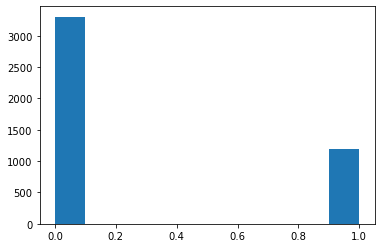

In [8]:
plt.hist(y_t)